In [59]:
import pandas as pd
import numpy as np
import joblib

import sys

sys.path.insert(1, '..')
sys.path.insert(1, 'C:/Users/61411/personal-project/NBA/my_packages/')

In [60]:
model = joblib.load('../my_models/final_model.pkl')
drop_cols = joblib.load('drop_cols.pkl')

test_data = pd.read_csv('../datasets/draft_combine_test.csv')
y = test_data['drafted']
X = test_data.drop(drop_cols, axis=1)

In [61]:
y_pred = (model.predict_proba(X) > 0.6)[:, 1]

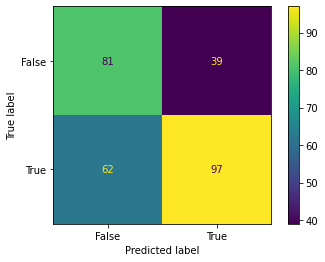

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y, y_pred)

In [63]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

       False       0.57      0.68      0.62       120
        True       0.71      0.61      0.66       159

    accuracy                           0.64       279
   macro avg       0.64      0.64      0.64       279
weighted avg       0.65      0.64      0.64       279



In [64]:
y_10pick = test_data[test_data.numberPickOverall<=5]['drafted']
X_10pick = test_data[test_data.numberPickOverall<=5].drop(drop_cols, axis=1)

y_pred_10pick = (model.predict_proba(X_10pick) > 0.6)[:, 1]

In [65]:
len(y_pred_10pick)

19

In [66]:
y_pred_10pick.sum()

14

In [67]:
top3_picks = test_data[test_data.numberPickOverall<=5]
top3_picks['prediction'] = y_pred_10pick

C:\Users\61411\AppData\Local\Temp\ipykernel_10096\3813666382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_picks['prediction'] = y_pred_10pick


In [68]:
top3_picks[['player_name', 'prediction']]

,player_name,prediction
15,Darius Garland,True
25,Mike Conley,False
29,Drew Gooden,False
42,DeMarcus Cousins,True
60,De'Andre Hunter,True
107,Devin Harris,True
145,Markelle Fultz,True
162,RJ Barrett,True
177,Victor Oladipo,True
201,Thomas Robinson,True
